#### NOTE: This course work made and compared classifiers using scikit-learn package

## Classification using scikit-learn 

### a.Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. 

In [1]:
#read in the necessary libraries
import math
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
#load in data
bank = pd.read_csv('~/desktop/bank_data.csv', index_col=0, sep=',')
bank.head(5)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [3]:
###Preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn.
# Separate the target attribute ("pep")
# bank_records : train, bank_target : target
bank_records = bank[['age','income', 'children', 'gender','region','married','car','savings_acct','current_acct','mortgage']]
bank_records.head(5)

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
id,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [4]:
bank_target = bank.pep
bank_target.head(5)

id
ID12101    YES
ID12102     NO
ID12103     NO
ID12104     NO
ID12105     NO
Name: pep, dtype: object

In [5]:
#Convert the selected dataset into the Standard Spreadsheet format
#get_dummies" function to create dummy variables and converting to standard spreadsheet format
bank_matrix = pd.get_dummies(bank_records[['age','income', 'children', 'gender','region','married','car','savings_acct','current_acct','mortgage']])
bank_matrix.head(5)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12101,48,17546.0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
ID12102,40,30085.1,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
ID12103,51,16575.4,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
ID12104,23,20375.4,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
ID12105,57,50576.3,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0


In [6]:
#Split the transformed data into training and test sets (using 80%-20% randomized split)
from sklearn.cross_validation import train_test_split
bank_train, bank_test, bank_target_train, bank_target_test = train_test_split(bank_matrix, bank_target, test_size=0.2, random_state=33)

/Users/Alexkilledme/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# bank_record:
print bank_train.shape,bank_test.shape

(480, 19) (120, 19)


In [8]:
# bank_target:
print bank_target_train.shape, bank_target_test.shape

(480,) (120,)


### b.Run scikit-learn's KNN classifier on the test set.

In [9]:
###Normalize the data so that the values are between 0 and 1

In [10]:
from sklearn import preprocessing

In [11]:
min_max_scaler = preprocessing.MinMaxScaler().fit(bank_train)
bank_train_norm = min_max_scaler.transform(bank_train)
bank_test_norm = min_max_scaler.transform(bank_test)

In [12]:
np.set_printoptions(precision=2, linewidth=100)
bank_train_norm[0:5]

array([[0.57, 0.46, 0.67, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 1.  , 1.  , 0.  ],
       [0.8 , 0.78, 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ,
        1.  , 0.  , 1.  , 0.  ],
       [0.14, 0.16, 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 1.  , 0.  ],
       [0.35, 0.18, 0.33, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 1.  , 0.  ],
       [0.33, 0.18, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  ]])

In [13]:
bank_test_norm[0:5]

array([[0.29, 0.12, 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.84, 0.41, 0.33, 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  ,
        0.  , 1.  , 1.  , 0.  ],
       [0.88, 0.62, 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  ,
        0.  , 1.  , 0.  , 1.  ],
       [0.71, 0.75, 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ,
        1.  , 0.  , 1.  , 0.  ],
       [0.96, 0.56, 0.33, 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ,
        1.  , 0.  , 0.  , 1.  ]])

In [14]:
###scikit-learn's KNN classifier
from sklearn import neighbors, tree, naive_bayes

In [15]:
#Training
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knnclf.fit(bank_train_norm, bank_target_train)
#Tried to run this with 2 - 5 neighbors, and with a weight of distance and uniform

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
#Testing
knnpreds_test = knnclf.predict(bank_test_norm)
print (knnpreds_test)

['YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [17]:
###the confusion matrix, classification report, and the average accuracy score
from sklearn.metrics import classification_report, confusion_matrix

#Classification report
knnClfReport = classification_report(bank_target_test, knnpreds_test)
#Confusion matrix
knnCm = (confusion_matrix(bank_target_test, knnpreds_test))
#The average accuracy score
knnTestScore = knnclf.score(bank_test_norm, bank_target_test)
knnTrainScore = knnclf.score(bank_train_norm, bank_target_train)

In [18]:
print(knnClfReport)

             precision    recall  f1-score   support

         NO       0.69      0.73      0.71        66
        YES       0.64      0.59      0.62        54

avg / total       0.67      0.67      0.67       120



In [19]:
print(knnCm)

[[48 18]
 [22 32]]


In [20]:
print(knnTestScore)

0.6666666666666666


In [21]:
print(knnTrainScore)

0.7833333333333333


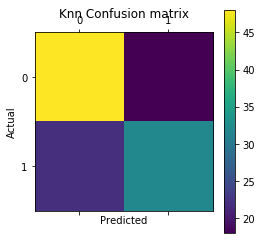

In [22]:
plt.matshow(knnCm)
plt.title('Knn Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

/Users/Alexkilledme/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


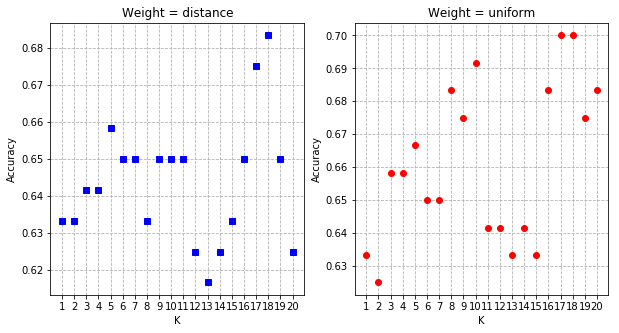

In [23]:
### Experiment with different values of K and the weight parameter for KNN

# experiment K = 1~20 and weights = 'distance' then visulize it

fig= plt.figure(figsize=(10,5))
K= list(range(1,21))

for i in range(1,21):
        
        #Knn wiht weights='distance'
        knnclf = neighbors.KNeighborsClassifier(i, weights='distance')
        knnclf.fit(bank_train_norm, bank_target_train)

        accuracy = knnclf.score(bank_test_norm, bank_target_test)

        ax1=fig.add_subplot(121)
        ax1.set_title('Weight = distance')
        ax1.set_xlabel('K')
        ax1.set_ylabel('Accuracy')
        plt.plot(i,accuracy,'bs')
        plt.grid(linestyle='--')
        plt.xticks(K)
        
        #Knn wiht weights='uniform'
        knnclf = neighbors.KNeighborsClassifier(i, weights='uniform')
        knnclf.fit(bank_train_norm, bank_target_train)

        accuracy = knnclf.score(bank_test_norm, bank_target_test)

        ax2=fig.add_subplot(122)
        ax2.set_title('Weight = uniform')
        ax2.set_xlabel('K')
        ax2.set_ylabel('Accuracy')
        plt.plot(i,accuracy,'ro')
        plt.grid(linestyle='--')
        plt.xticks(K)


plt.show()

After trying to use k value from 1~20, and comparing distance and uniform as weight, I found that with k=17,k=18 and Uniform as weight, I got about 0.70 testing score which was the highest in my experiments.

In [24]:
### Checking if there is an overfitting in the model for k=17 and k=18
#Training
n_neighbors = 18
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knnclf.fit(bank_train_norm, bank_target_train)
#Tried to run this with 2 - 5 neighbors, and with a weight of distance and uniform

#Testing
knnpreds_test = knnclf.predict(bank_test_norm)
print (knnpreds_test)

###the confusion matrix, classification report, and the average accuracy score
from sklearn.metrics import classification_report, confusion_matrix

#Classification report
knnClfReport = classification_report(bank_target_test, knnpreds_test)
#Confusion matrix
knnCm = (confusion_matrix(bank_target_test, knnpreds_test))
#The average accuracy score
knnTestScore = knnclf.score(bank_test_norm, bank_target_test)
knnTrainScore = knnclf.score(bank_train_norm, bank_target_train)

print(knnTestScore),(knnTrainScore)

['NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO']
0.7 0.7083333333333334


After trying k=17 and k=18 for test and train scores, we found that there is no overfitting since test and train scores are almost the same.

### c.Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the Naive Bayes (Gaussian) classifier. 

In [25]:
### scikit-learn's decision tree classifier

In [26]:
from sklearn import tree

In [27]:
treeclf = tree.DecisionTreeClassifier()
treeclf = treeclf.fit(bank_train, bank_target_train)
treepreds_test = treeclf.predict(bank_test)
print (treepreds_test)

['NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES'
 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [28]:
#report
treeClfReport = classification_report(bank_target_test, treepreds_test)

#matrix
treeCm = confusion_matrix(bank_target_test, treepreds_test)

#Accuracy
treeTestScore = treeclf.score(bank_test_norm, bank_target_test)
treeTrainScore = treeclf.score(bank_train_norm, bank_target_train)

In [29]:
print(treeClfReport)

             precision    recall  f1-score   support

         NO       0.81      0.86      0.84        66
        YES       0.82      0.76      0.79        54

avg / total       0.82      0.82      0.82       120



In [30]:
print(treeCm)

[[57  9]
 [13 41]]


In [31]:
print(treeTestScore),(treeTrainScore)

0.625 0.68125


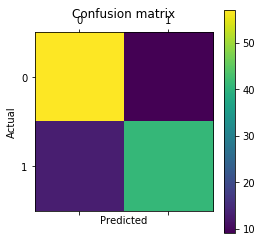

In [32]:
# confusion matrix
plt.matshow(treeCm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.grid(False)
plt.show()

In [33]:
### scikit-learn's Naive Bayes (Gaussian) classifier
from sklearn import naive_bayes

nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(bank_train, bank_target_train)
nbpreds_test = nbclf.predict(bank_test)
print (nbpreds_test)

['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [34]:
#report
nbClfReport = classification_report(bank_target_test, nbpreds_test)

#matrix
nbCm = confusion_matrix(bank_target_test, nbpreds_test)

#accuracy
nbTestScore = nbclf.score(bank_test_norm, bank_target_test)
nbTrainScore = nbclf.score(bank_train_norm, bank_target_train)

In [35]:
print(nbClfReport)

             precision    recall  f1-score   support

         NO       0.60      0.74      0.67        66
        YES       0.56      0.41      0.47        54

avg / total       0.59      0.59      0.58       120



In [36]:
print(nbCm)

[[49 17]
 [32 22]]


In [37]:
print(nbTestScore)

0.55


In [38]:
print(nbTrainScore)

0.5375


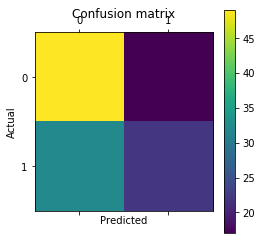

In [39]:
#Confusion matrix
plt.matshow(nbCm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.grid(False)
plt.show()

### d. Discuss your observations based on the above experiments.

After comparison, we can see that KNN has the highest accuracy which means it is the best classifier.  
For decision tree, we can see that train score is little higher than test score which means the model has little overfitting. 
For Naive Bayes classifier, we can see that there are lowest accuracies rate for both training and testing which means the model is too simple to explain variance and need to be complicated.
For KNN, we found that different weight method and k values affect accuracies of training data and testing data, through adjust these two parameter we can aviod overfitting or underfitting problems(like what we did before.)